## More on color Images

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

### PNG Images (With an Alpha Channel)

We are going to load a PNG image.

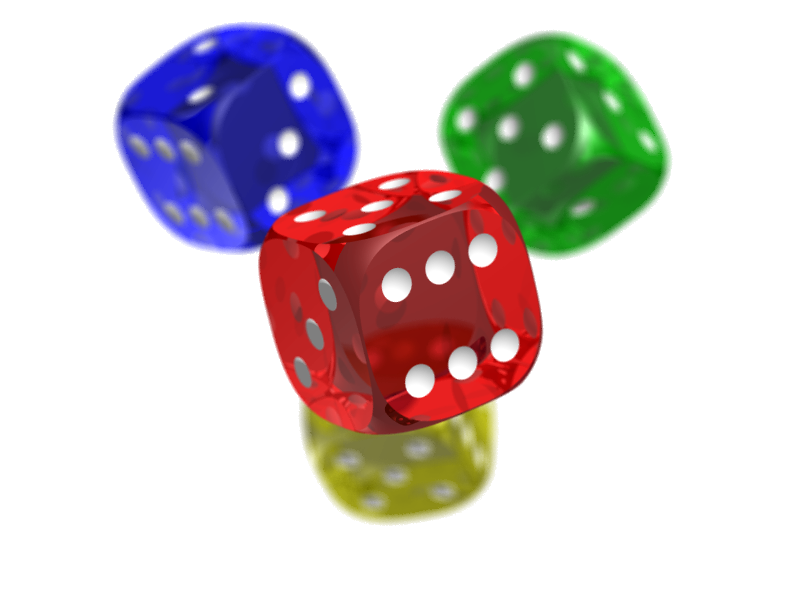

In [2]:
Image("cubes.png", width=400)

This (above) is what we expect

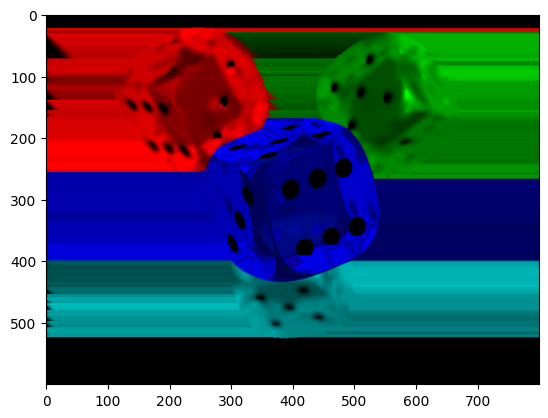

In [3]:
png_img = cv2.imread("images/cubes.png", cv2.IMREAD_COLOR)
plt.figure()
plt.imshow(png_img)

## Why does it look like this?

Well, first, remember that OpenCV uses BGR whereas Matplotlib uses RGB. So we are going to switch it up. OpenCV offers a handy way of doing this, in their function `cv2.cvtColor`. There is also another handy way to do it, which we are going to try.

In [4]:
png_img = png_img[:, :, ::-1]

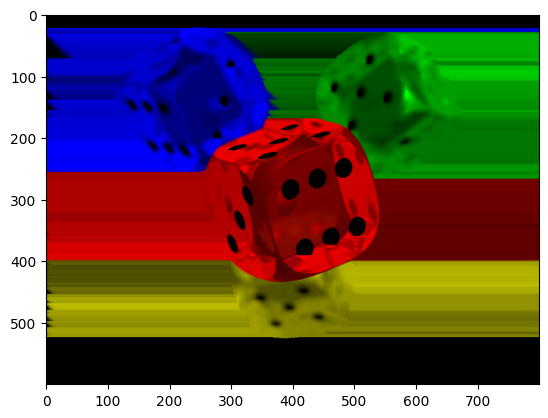

In [5]:
plt.imshow(png_img)

We are still not there yet. Why is that? Well, the image we loaded in is a PNG image with an alpha channel. Yet, we read it in as a color image, 3-channel. Let's retry that, using `cv2.IMREAD_UNCHANGED`

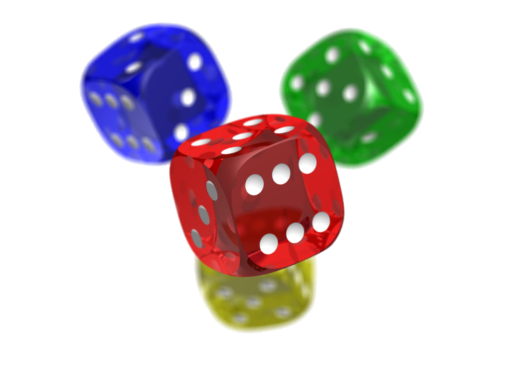

In [6]:
png_alpha = cv2.imread("images/cubes.png", cv2.IMREAD_UNCHANGED)
#We switch it from BGRA to RGBA
png_alpha = cv2.cvtColor(png_alpha, cv2.COLOR_BGRA2RGBA)
plt.imshow(png_alpha)
_ = plt.axis("off")

There we have it!

## Splitting channels

We are now going to split an image into its channels. Let's load it up.

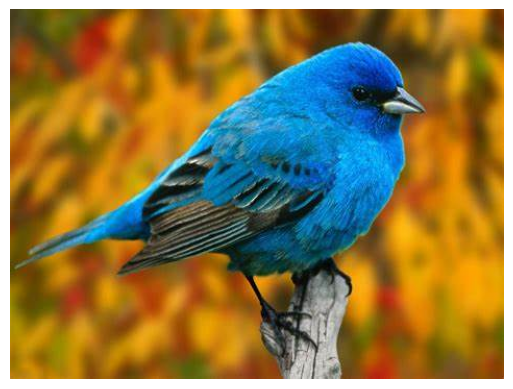

In [7]:
bluebird = cv2.imread("images/bluebird.jpg", cv2.IMREAD_COLOR) #It's a 3-channel image
bluebird = bluebird[:, :, ::-1] #BGR to RGB
plt.imshow(bluebird)
_ = plt.axis("off")

We will use OpenCV's built-in `split()` and `merge()` function to split and merge channels.

Text(0.5, 1.0, 'Merged')

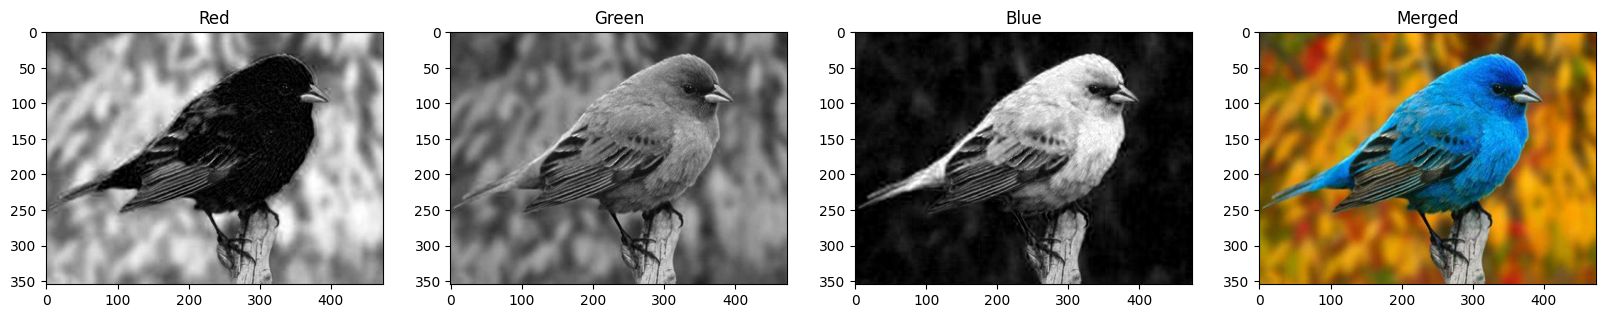

In [11]:
r, g, b = cv2.split(bluebird)
plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(r); plt.title("Red")
plt.subplot(142); plt.imshow(g); plt.title("Green")
plt.subplot(143); plt.imshow(b); plt.title("Blue")

#merging the individual channels
bluebird_merged = cv2.merge((r, g, b))

plt.subplot(144); plt.imshow(bluebird_merged); plt.title("Merged")

Let's examine the individual channels.

In [9]:
type(b)

numpy.ndarray

In [10]:
b

array([[ 73,  72,  72, ..., 119, 127, 127],
       [ 73,  72,  72, ..., 118, 126, 126],
       [ 72,  72,  71, ..., 117, 124, 124],
       ...,
       [186, 180, 179, ..., 135, 126, 142],
       [186, 180, 180, ..., 135, 139, 156],
       [189, 183, 183, ..., 135, 143, 160]], dtype=uint8)

b contains the values of the blue channel. The larger the number `range[0 - 255]` the larger the significance of blue in the image. In the plot above, we see that in blue, the bird is lighter showing that there is a larger concentration of blue there than in the surrounding region which is darker. We can go ahead and plot that.

In [12]:
b.shape

(355, 474)

We will sample `b` taking the mean of every `5 * 6` block. This will make it `71 by 79` pixels. We will then go ahead and plot this.

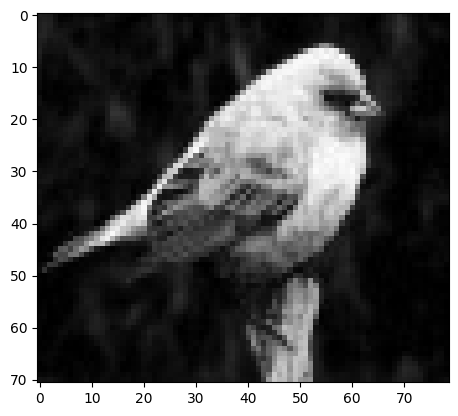

In [17]:
newb = np.zeros(71*79, dtype=b.dtype)
where = 0
for row in range(0, b.shape[0], 5):
    for col in range(0, b.shape[1], 6):
        newb[where] = np.mean(b[row:row+5, col:col+6])
        where += 1

newbird = np.reshape(newb, (71, 79))
plt.imshow(newbird)

Heavily pixelated, I know. We will be able to reduce computation resource usage. Let's see if it will serve our purpose. We are going to use a 3D plot to best illustrate our image. We will use matplotlib's `plot_surface`.

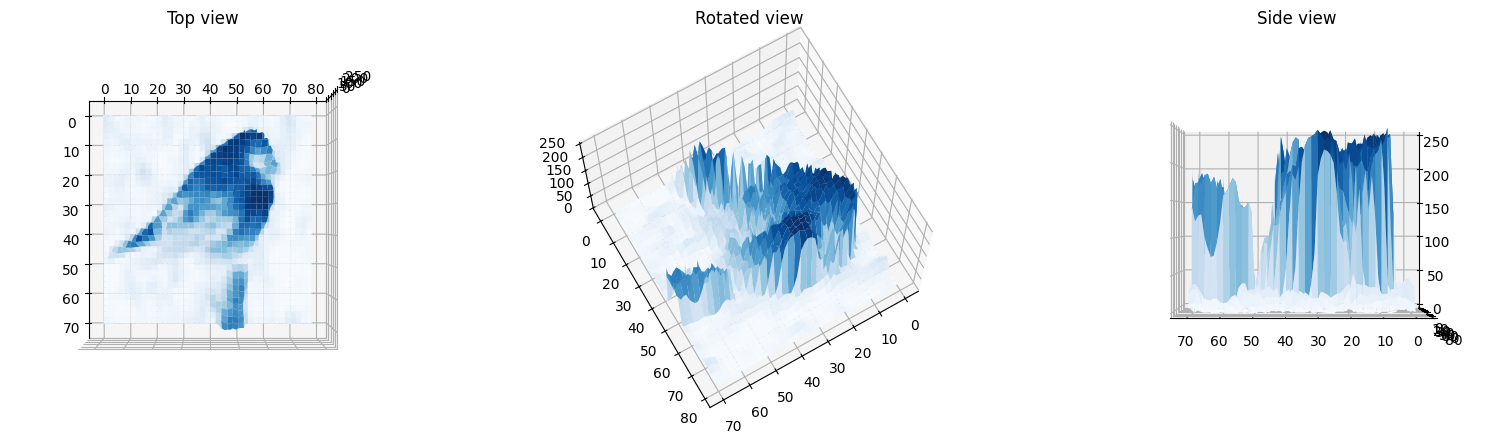

In [118]:
X = np.arange(71)
Y = np.arange(79)
X, Y = np.meshgrid(Y, X)

fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(20, 5))

#Axis 0
_ = ax[0].plot_surface(Y, X, newbird,  cmap=matplotlib.cm.Blues)
ax[0].set(title="Top view")
ax[0].azim = 0
ax[0].elev = 90

#Axis 1
_ = ax[1].plot_surface(Y, X, newbird,  cmap=matplotlib.cm.Blues)
ax[1].set(title="Rotated view")
ax[1].elev = 70
ax[1].azim = 60

#Axis 2
_ = ax[2].plot_surface(Y, X, newbird,  cmap=matplotlib.cm.Blues)
ax[2].set(title="Side view")
ax[2].elev = 0 
ax[2].azim = 90

The plots above show us the image created above (the `71 x 79` image from the original) plotted and shown from three different angles.
<br>
Larger values of the Z axis get a darker shade of blue than smaller values.
<br>
<br>
From the plot:
* we can make out the image of the bird from the **Top view**.
* We can also see that the higher values are concentrated around the bird and the values get smaller as you move outwards. This verifies that blue is the dominant color of the bird... as can be observed from the original image. (The bird is blue!).

So, to recap, we took `b` which represented the blue channel. We noticed that the bird was whiter than the dark surrounding and hypothesized that there was a large concentration of blue there.
<br>
We then went ahead and scaled the `355 * 474` image to `71 * 79` (for computation sake?) and plotted it.
<br>
From the plots, although every value in the Z axis is a blue, we see that the values are higher around the bird and lower elsewhere (darker blues from **Top view** and longer bars from **Side view**) proving that blues largely dominate the are around the bird hence its whiteness.

## Saving color images

In [147]:
#We are going to see how to save color images
cv2.imwrite("bluebird_saved_naive.jpg", bluebird_merged)

True

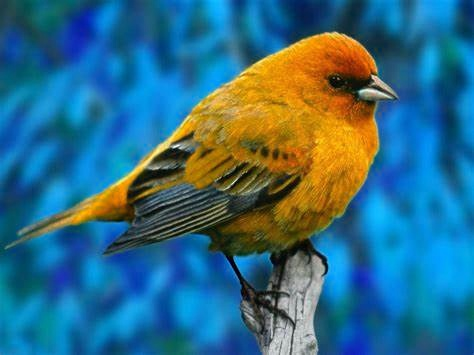

In [148]:
#Lets try re-read the image
Image("bluebird_saved_naive.jpg")

We see the image is different from the one we had created. This is because OpenCV deals with BGR and we passed in an RGB. Let's color convert the image and try again.

In [149]:
bluebird_merged = bluebird_merged[:, :, ::-1]
cv2.imwrite("bluebird_saved_right.jpg", bluebird_merged)

True

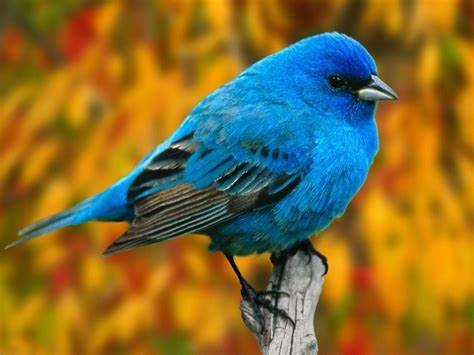

In [150]:
#lets reload it
Image("bluebird_saved_right.jpg")

There we have it!
<br>
**NB:** Ensure to convert an image to BGR before saving it with OpenCV.